In [14]:
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
import time

In [15]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python35.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\TauHybridSolver\\GillesPy2']


In [16]:
import math
import gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver


The performance of this package can be significantly increased if you install Cython.


In [17]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=init_v)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
#             rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
#             self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,100, 101))

In [18]:
model = SimpleHybridModel(init_v=170)

In [6]:
%time results1 = model.run(solver=BasicSSASolver(), show_labels=True)
%time results2 = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
%time results3 = model.run(solver=BasicTauHybridSolver(), show_labels=True)

Wall time: 19.8 s
Wall time: 4.82 s
Wall time: 15.6 s


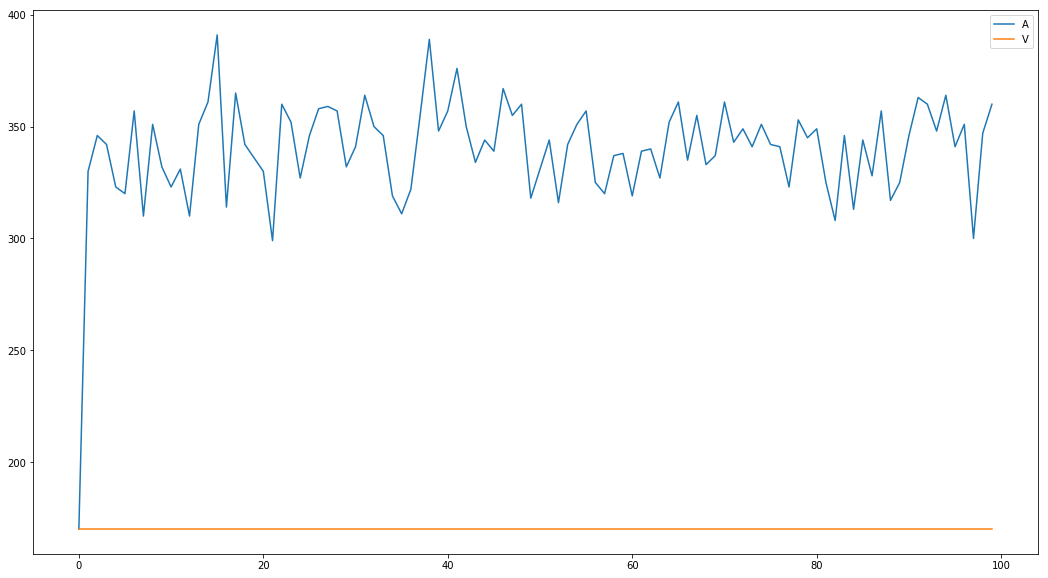

In [7]:
plt.figure(figsize=(18,10))
plt.plot(results1['time'], results1['A'], label='A')
plt.plot(results1['time'], results1['V'], label='V')
plt.legend(loc='best')

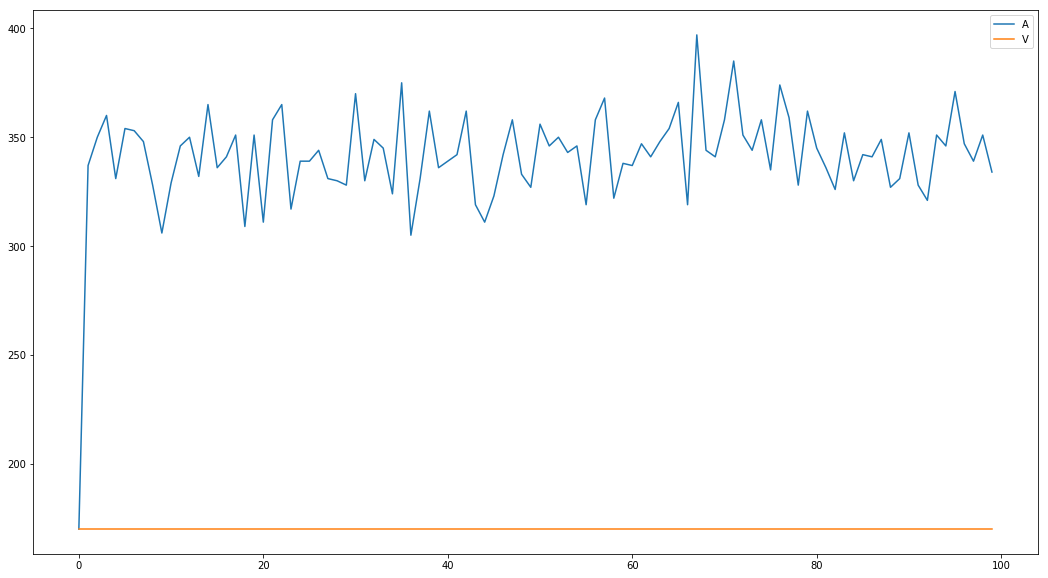

In [8]:
plt.figure(figsize=(18,10))
plt.plot(results2['time'], results2['A'], label='A')
plt.plot(results2['time'], results2['V'], label='V')
plt.legend(loc='best')

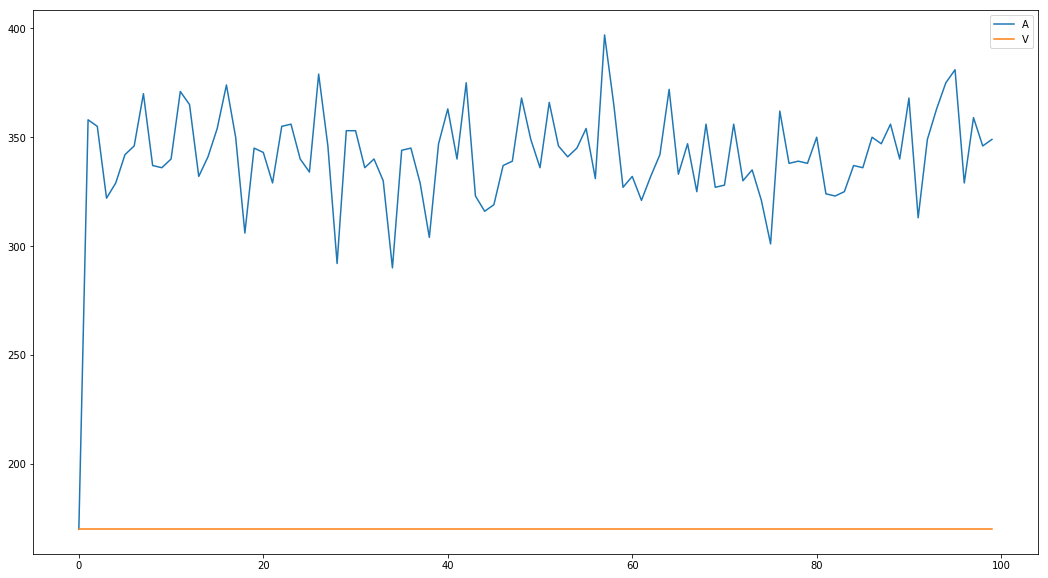

In [9]:
plt.figure(figsize=(18,10))
plt.plot(results3['time'], results3['A'], label='A')
plt.plot(results3['time'], results3['V'], label='V')
plt.legend(loc='best')

In [ ]:
v_range = range(1, 500)
def run_test(solver, v_range):
    run_data = []
    for n in v_range:
        model = SimpleHybridModel(init_v=n)
        time_start = time.perf_counter()
        model.run(solver=solver, show_labels=True)
        time_end = time.perf_counter()
        run_data.append(time_end-time_start)
    return run_data

In [ ]:
timing_data = {'basic':[], 'tau':[], 'hybrid_tau':[]}
%time timing_data['basic'] = run_test(BasicSSASolver(), v_range)
%time timing_data['tau'] = run_test(BasicTauLeapingSolver(), v_range)
%time timing_data['hybrid_tau'] = run_test(BasicTauHybridSolver(), v_range)
print(timing_data)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V (species count)")
plt.ylabel("Simulation Run Time (s)")
plt.plot(v_range, timing_data['basic'], label='basic')
plt.plot(v_range, timing_data['tau'], label='tau')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")

TODO: Put units on axes.  Run speed test until Hybrid crosses SSA.  Perform accuracy test. Lint. Document. Accuracy validation against stoch kit.  Plot of epsilon vs ks-distance (error margin). Find good accuracy testing model.  see what others are doing for accuracy testing.  Ask Brian for polarization model. move seaborn to plotting function.

In [1]:
import pickle

In [11]:
file_name = 'time_comparison_data'

file_object = open(file_name, 'rb')
data = pickle.load(file_object)
data.keys()
print('TAU RESULTS:\n', data['tau'])
print('HYBRID RESULTS:\n', data['hybrid_tau'])
print('BASIC RESULTS:\n', data['basic'])

TAU RESULTS:
 [0.06475922814570367, 0.1117691919207573, 0.1548931400757283, 0.21676218416541815, 0.26633779099211097, 0.31363720283843577, 0.3758526570163667, 0.4164102890063077, 0.481075193034485, 0.5118967711459845, 0.5627206729259342, 0.6162519559729844, 0.6690557149704546, 0.730481639970094, 0.7728468698915094, 0.8274544950108975, 0.8853205821942538, 0.9206842829007655, 0.9858433539047837, 1.0392903201282024, 1.0939738990273327, 1.1457673588301986, 1.1691205229144543, 1.22098367405124, 1.2818418750539422, 1.3386547139380127, 1.4212441728450358, 1.4546740548685193, 1.5048816720955074, 1.5469800499267876, 1.6088296030648053, 1.6407055088784546, 1.7225310821086168, 1.7642093291506171, 1.8542359990533441, 1.9224407621659338, 1.9472652599215508, 1.965920401038602, 2.003391192993149, 2.0825730788055807, 2.1112994959112257, 2.1848707860335708, 2.210831423988566, 2.3356007169932127, 2.311918403953314, 2.334987406851724, 2.395468278089538, 2.682734285015613, 2.4853811271023005, 2.4807753427

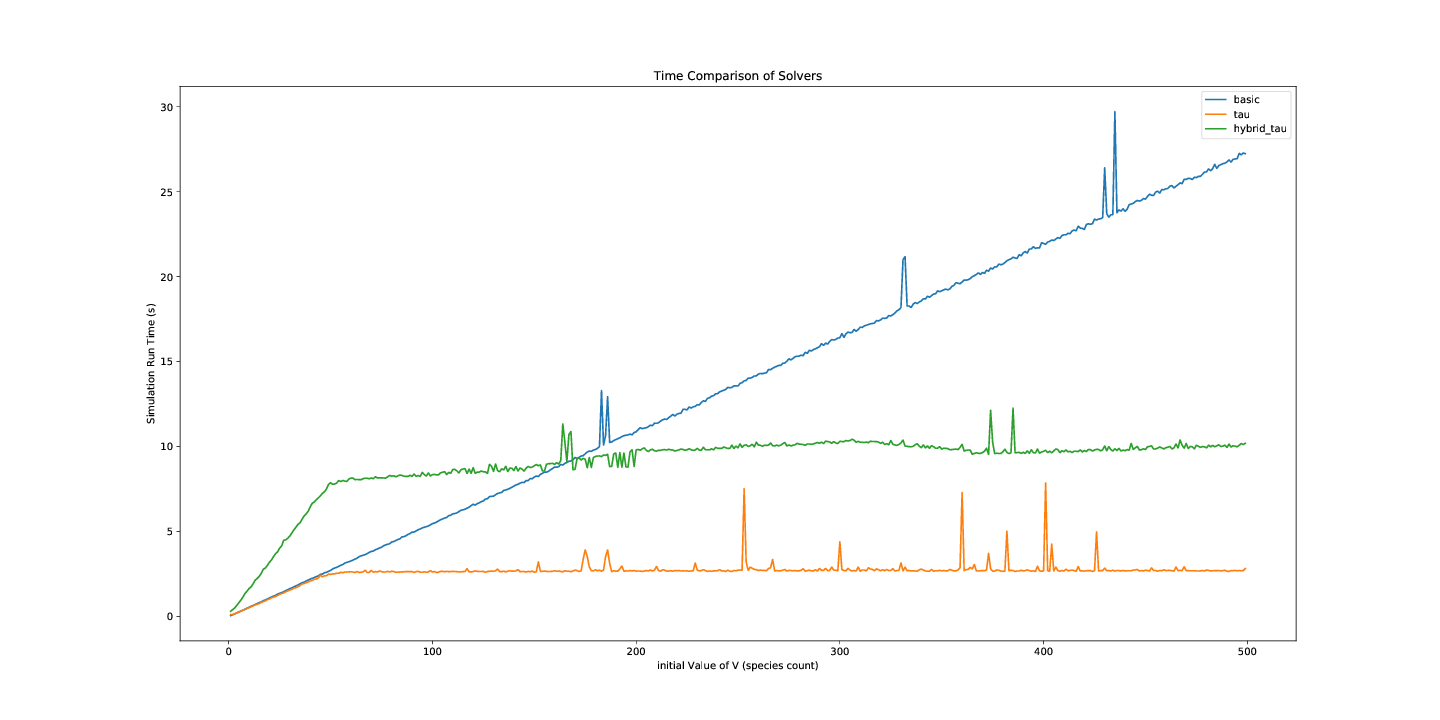

In [7]:
from wand.image import Image as WImage
img = WImage(filename='TimeComparisonOfSolvers.pdf')
img